In [1]:
%install-swiftpm-flags -c release
%install '.package(url: "https://github.com/apple/swift-protobuf.git", from: "1.6.0")' SwiftProtobuf
import SwiftProtobuf

Installing packages:
	.package(url: "https://github.com/apple/swift-protobuf.git", from: "1.6.0")
		SwiftProtobuf
With SwiftPM flags: ['-c', 'release']
Working in: /tmp/tmptw662vr0/swift-install
Fetching https://github.com/apple/swift-protobuf.git
Cloning https://github.com/apple/swift-protobuf.git
Resolving https://github.com/apple/swift-protobuf.git at 1.7.0
[1/2] Compiling SwiftProtobuf AnyMessageStorage.swift
[2/3] Compiling jupyterInstalledPackages jupyterInstalledPackages.swift
[3/3] Linking libjupyterInstalledPackages.so
Initializing Swift...
Installation complete!


In [2]:
%include "EnableIPythonDisplay.swift"
IPythonDisplay.shell.enable_matplotlib("inline")

('inline', 'module://ipykernel.pylab.backend_inline')


In [3]:
import Python
import TensorFlow

In [4]:
let plt = Python.import("matplotlib.pyplot")

In [5]:
let SAMPLE_SIZE = 100

let a: Float = 2.0
let b: Float = 1.5
let x = Tensor<Float>(rangeFrom: 0, to: 1, stride: 1.0 / Float(SAMPLE_SIZE))
let noise = (Tensor<Float>(randomNormal: [SAMPLE_SIZE]) - 0.5) * 0.1
let y = (a * x + b) + noise

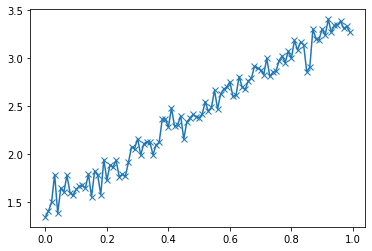

None


In [6]:
plt.clf()
plt.plot(x.makeNumpyArray(), y.makeNumpyArray(), marker: "x")
plt.show()

In [7]:
print(x.shape)
print(y.shape)

[100]
[100]


In [8]:
let X = x.reshaped(toShape: [100, 1]) //SAMPLE_SIZE
let Y = y.reshaped(toShape: [100, 1]) //SAMPLE_SIZE
print(X.shape)
print(Y.shape)

[100, 1]
[100, 1]


In [9]:
struct LinearRegression: Layer {
    var layer1 = Dense<Float>(inputSize: 1, outputSize: 1, activation: identity)
    
    @differentiable
    func callAsFunction(_ input: Tensor<Float>) -> Tensor<Float> {
        return layer1(input)
    }
}


In [10]:
var regression = LinearRegression()
let optimizer = SGD(for: regression, learningRate: 0.03)
Context.local.learningPhase = .training

In [11]:
for _ in 0..<1000 {
    let 𝛁model = regression.gradient { r -> Tensor<Float> in
        let ŷ = r(X)
        let loss = meanSquaredError(predicted: ŷ, expected: Y)
        print("Loss: \(loss)")
        return loss
    }
    optimizer.update(&regression, along: 𝛁model)
}

Loss: 11.520539
Loss: 9.900161
Loss: 8.515493
Loss: 7.3321815
Loss: 6.320886
Loss: 5.456539
Loss: 4.717727
Loss: 4.0861583
Loss: 3.5462046
Loss: 3.0845182
Loss: 2.689695
Loss: 2.3519936
Loss: 2.063092
Loss: 1.8158815
Loss: 1.6042888
Loss: 1.4231262
Loss: 1.2679619
Loss: 1.1350099
Loss: 1.0210363
Loss: 0.9232781
Loss: 0.83937514
Loss: 0.76731116
Loss: 0.7053639
Loss: 0.65206206
Loss: 0.60614836
Loss: 0.5665491
Loss: 0.532347
Loss: 0.5027585
Loss: 0.477114
Loss: 0.4548416
Loss: 0.43545285
Loss: 0.41853017
Loss: 0.40371713
Loss: 0.39070895
Loss: 0.37924552
Loss: 0.3691044
Loss: 0.36009562
Loss: 0.35205692
Loss: 0.34484962
Loss: 0.33835518
Loss: 0.33247244
Loss: 0.3271149
Loss: 0.32220864
Loss: 0.3176904
Loss: 0.31350628
Loss: 0.30961013
Loss: 0.30596265
Loss: 0.3025299
Loss: 0.29928327
Loss: 0.296198
Loss: 0.29325315
Loss: 0.2904306
Loss: 0.287715
Loss: 0.28509316
Loss: 0.2825538
Loss: 0.28008726
Loss: 0.27768528
Loss: 0.2753408
Loss: 0.2730478
Loss: 0.27080095
Loss: 0.26859587
Loss: 0.26

Loss: 0.014537795
Loss: 0.014499228
Loss: 0.014460967
Loss: 0.014423012
Loss: 0.014385346
Loss: 0.014347984
Loss: 0.014310918
Loss: 0.014274146
Loss: 0.014237661
Loss: 0.014201468
Loss: 0.01416556
Loss: 0.014129934
Loss: 0.014094591
Loss: 0.014059531
Loss: 0.014024747
Loss: 0.013990232
Loss: 0.013955998
Loss: 0.01392203
Loss: 0.01388833
Loss: 0.013854904
Loss: 0.01382173
Loss: 0.013788822
Loss: 0.01375618
Loss: 0.013723793
Loss: 0.013691663
Loss: 0.013659786
Loss: 0.013628156
Loss: 0.013596778
Loss: 0.013565651
Loss: 0.013534772
Loss: 0.013504132
Loss: 0.013473741
Loss: 0.013443581
Loss: 0.013413663
Loss: 0.013383982
Loss: 0.013354543
Loss: 0.013325324
Loss: 0.013296344
Loss: 0.013267586
Loss: 0.013239067
Loss: 0.013210761
Loss: 0.01318269
Loss: 0.013154837
Loss: 0.013127209
Loss: 0.013099787
Loss: 0.0130725885
Loss: 0.013045604
Loss: 0.013018833
Loss: 0.012992279
Loss: 0.01296593
Loss: 0.012939786
Loss: 0.012913854
Loss: 0.012888124
Loss: 0.0128625985
Loss: 0.012837274
Loss: 0.0128121

In [12]:
let weight = Float(regression.layer1.weight[0][0])!
let bias = Float(regression.layer1.bias[0])!
print(weight, bias)

1.949164 1.4669305


In [13]:
Context.local.learningPhase = .inference
let score = regression(X)
let y2 = score.reshaped(toShape: [100])

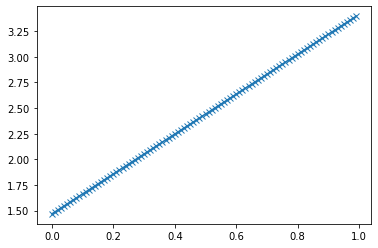

None


In [14]:
plt.clf()
plt.plot(x.makeNumpyArray(), y2.makeNumpyArray(), marker: "x")
plt.show()

In [15]:
%include "./CoreMLProto/ArrayFeatureExtractor.pb.swift"

In [16]:
%include "./CoreMLProto/BayesianProbitRegressor.pb.swift"

In [17]:
%include "./CoreMLProto/DataStructures.pb.swift"

In [18]:
%include "./CoreMLProto/CategoricalMapping.pb.swift"

In [19]:
%include "./CoreMLProto/CustomModel.pb.swift"

In [20]:
%include "./CoreMLProto/DictVectorizer.pb.swift"

In [21]:
%include "./CoreMLProto/FeatureTypes.pb.swift"

In [22]:
%include "./CoreMLProto/FeatureVectorizer.pb.swift"

In [23]:
%include "./CoreMLProto/GLMClassifier.pb.swift"

In [24]:
%include "./CoreMLProto/GLMRegressor.pb.swift"

In [25]:
%include "./CoreMLProto/Gazetteer.pb.swift"

In [26]:
%include "./CoreMLProto/Identity.pb.swift"

In [27]:
%include "./CoreMLProto/Imputer.pb.swift"

In [28]:
%include "./CoreMLProto/Scaler.pb.swift"

In [29]:
%include "./CoreMLProto/ItemSimilarityRecommender.pb.swift"

In [30]:
%include "./CoreMLProto/Parameters.pb.swift"

In [31]:
%include "./CoreMLProto/Normalizer.pb.swift"

In [32]:
%include "./CoreMLProto/LinkedModel.pb.swift"

In [33]:
%include "./CoreMLProto/NearestNeighbors.pb.swift"

In [34]:
%include "./CoreMLProto/NonMaximumSuppression.pb.swift"

In [35]:
%include "./CoreMLProto/OneHotEncoder.pb.swift"

In [36]:
%include "./CoreMLProto/SVM.pb.swift"

In [37]:
%include "./CoreMLProto/SoundAnalysisPreprocessing.pb.swift"

In [38]:
%include "./CoreMLProto/TextClassifier.pb.swift"

In [39]:
%include "./CoreMLProto/TreeEnsemble.pb.swift"

In [40]:
%include "./CoreMLProto/VisionFeaturePrint.pb.swift"

In [41]:
%include "./CoreMLProto/WordEmbedding.pb.swift"

In [42]:
%include "./CoreMLProto/WordTagger.pb.swift"

In [43]:
%include "./CoreMLProto/NeuralNetwork.pb.swift"

In [44]:
%include "./CoreMLProto/Model.pb.swift"

In [45]:
let coreModel = CoreML_Specification_Model.with {
    $0.specificationVersion = 4
    $0.description_p = CoreML_Specification_ModelDescription.with {
        $0.input = [CoreML_Specification_FeatureDescription.with {
            $0.name = "dense_input"
            $0.type = CoreML_Specification_FeatureType.with {
                $0.multiArrayType = CoreML_Specification_ArrayFeatureType.with {
                    $0.shape = [1, 1]
                    $0.dataType = CoreML_Specification_ArrayFeatureType.ArrayDataType.double
                }
            }
        }]
        $0.output = [CoreML_Specification_FeatureDescription.with {
            $0.name = "Identity"
            $0.type = CoreML_Specification_FeatureType.with {
                $0.multiArrayType = CoreML_Specification_ArrayFeatureType.with {
                    $0.dataType = CoreML_Specification_ArrayFeatureType.ArrayDataType.double
                }
            }
        }]
        $0.metadata = CoreML_Specification_Metadata.with {
            $0.userDefined = ["coremltoolsVersion" : "3.1"]
        }
    }
    $0.neuralNetwork = CoreML_Specification_NeuralNetwork.with {
        $0.layers = [CoreML_Specification_NeuralNetworkLayer.with {
            $0.name = "Identity"
            $0.input = ["dense_input"]
            $0.output = ["Identity"]
            $0.inputTensor = [CoreML_Specification_Tensor.with {
                $0.rank = 2
                $0.dimValue = [1, 1]
            }]
            $0.outputTensor = [CoreML_Specification_Tensor.with {
                $0.rank = 2
                $0.dimValue = [1, 1]
            }]
            $0.batchedMatmul = CoreML_Specification_BatchedMatMulLayerParams.with {
                $0.weightMatrixFirstDimension = 1
                $0.weightMatrixSecondDimension = 1
                $0.hasBias_p = true
                $0.weights = CoreML_Specification_WeightParams.with {
                    $0.floatValue = [weight]
                }
                $0.bias = CoreML_Specification_WeightParams.with {
                    $0.floatValue = [bias]
                }
            }
        }]
        $0.arrayInputShapeMapping = CoreML_Specification_NeuralNetworkMultiArrayShapeMapping.exactArrayMapping
        $0.imageInputShapeMapping = CoreML_Specification_NeuralNetworkImageShapeMapping.rank4ImageMapping
    }
}


In [46]:
let binaryModelData: Data = try coreModel.serializedData()

In [47]:
binaryModelData.write(to: URL(fileURLWithPath: "./s4tf_model.mlmodel"))